Rachel brought up whether we consider the GALEX detection limits in our forward model. In this notebook, I look at the distribution of FUV and NUV apparent and absolute magnitude to see if there's a sudden cut off anywhere.

In [1]:
import numpy as np
from galpopfm.catalogs import Catalog
# -- plotting -- 
import matplotlib as mpl
import matplotlib.pyplot as plt 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [2]:
sdss = Catalog('tinker')

# FUV and NUV apparent magnitude distributions
based on NASA-Sloan Atlas Petrosian fluxes

In [3]:
fuv = 22.5 - 2.5 * np.log10(sdss.data['NSA_PETROFLUX'][:,0])
nuv = 22.5 - 2.5 * np.log10(sdss.data['NSA_PETROFLUX'][:,1])

/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


(10.0, 30.0)

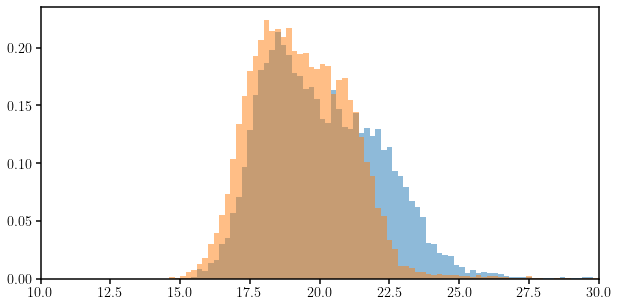

In [4]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
_ = sub.hist(fuv[np.isfinite(fuv)], range=(10, 30), bins=100, density=True, alpha=0.5)
_ = sub.hist(nuv[np.isfinite(nuv)], range=(10, 30), bins=100, density=True, alpha=0.5)
sub.set_xlim(10, 30)

# FUV and NUV absolute magnitude distributions

In [5]:
FUV = sdss.data['NSA_ABSMAG'][:,0]
NUV = sdss.data['NSA_ABSMAG'][:,1]

(-25.0, 0.0)

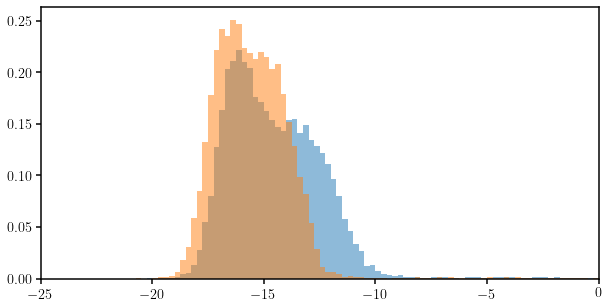

In [6]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
_ = sub.hist(FUV, range=(-25., 0), bins=100, density=True, alpha=0.5)
_ = sub.hist(NUV, range=(-25., 0), bins=100, density=True, alpha=0.5)
sub.set_xlim(-25, 0)

Doesn't look like there are any clear detection limits.

# FUV and NUV distribution for quiescent galaxies
Lets try looking at red/quiescent galaxies. See if we find a cut off there

In [7]:
Mr = sdss.data['NSA_ABSMAG'][:,4]
g = 22.5 - 2.5 * np.log10(sdss.data['NSA_PETROFLUX'][:,3])
r = 22.5 - 2.5 * np.log10(sdss.data['NSA_PETROFLUX'][:,4]) 

/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
red = ((g - r) > 0.8)

/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


(0.0, 1.5)

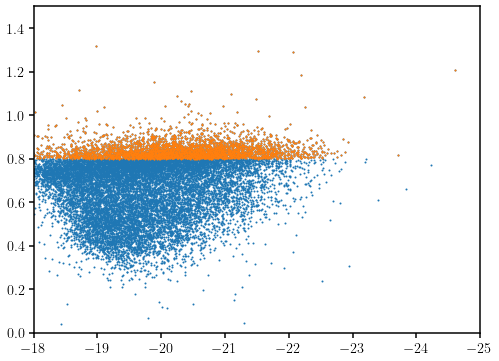

In [9]:
fig = plt.figure(figsize=(8,6))
sub = fig.add_subplot(111)
sub.scatter(Mr, g-r, s=1)
sub.scatter(Mr[red], (g-r)[red], s=1)
sub.set_xlim(-18, -25)
sub.set_ylim(0., 1.5)

/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in subtract
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in subtract
  after removing the cwd from sys.path.


(-5.0, 5.0)

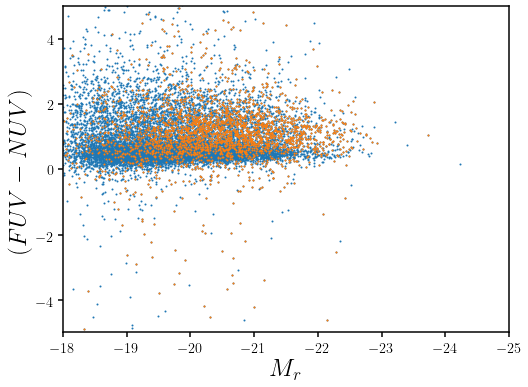

In [10]:
fig = plt.figure(figsize=(8,6))
sub = fig.add_subplot(111)
sub.scatter(Mr, fuv - nuv, s=1)
sub.scatter(Mr[red], (fuv-nuv)[red], s=1)
sub.set_xlabel(r'$M_r$', fontsize=25)
sub.set_xlim(-18, -25)
sub.set_ylabel(r'$(FUV - NUV)$', fontsize=25)
sub.set_ylim(-5, 5)

/opt/anaconda3/envs/iq/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/envs/iq/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(10.0, 30.0)

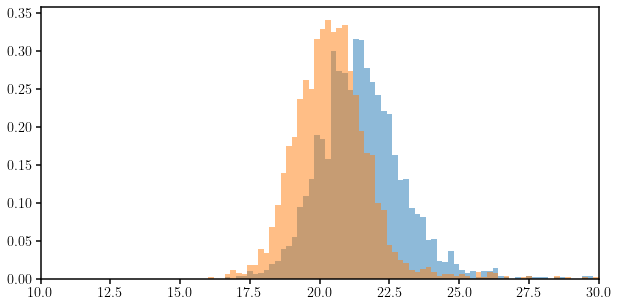

In [11]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
_ = sub.hist(fuv[red], range=(10, 30), bins=100, density=True, alpha=0.5)
_ = sub.hist(nuv[red], range=(10, 30), bins=100, density=True, alpha=0.5)
sub.set_xlim(10, 30)

Perhaps it's the NaNs? Lets see whether the NaNs occur primarily for galaxies in the red sequence

(0.0, 1.5)

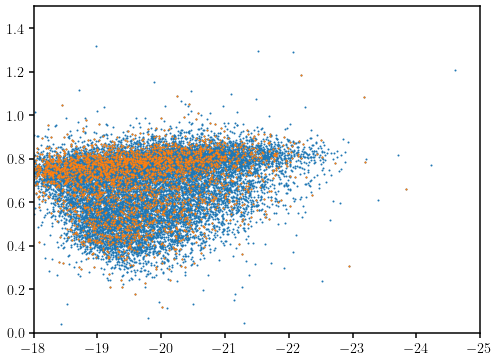

In [12]:
fig = plt.figure(figsize=(8,6))
sub = fig.add_subplot(111)
sub.scatter(Mr, g-r, s=1)
sub.scatter(Mr[~np.isfinite(fuv)], (g-r)[~np.isfinite(fuv)], s=1)
sub.set_xlim(-18, -25)
sub.set_ylim(0., 1.5)

(0.0, 1.5)

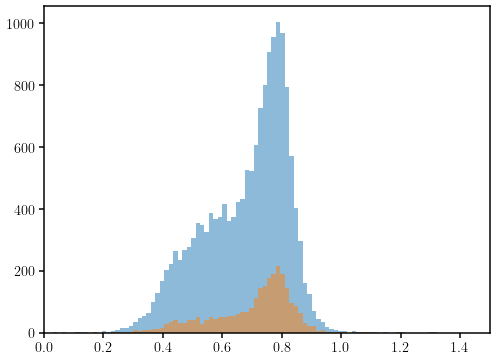

In [14]:
fig = plt.figure(figsize=(8,6))
sub = fig.add_subplot(111)
_ = sub.hist(g-r, range=(0., 1.5), bins=100, alpha=0.5)
_ = sub.hist((g-r)[~np.isfinite(fuv)], range=(0., 1.5), bins=100, alpha=0.5)
sub.set_xlim(0., 1.5)

Nope. Seems like a random sampling of color.